Chapter 4: Applying machine learning models to predict disease groups (CD, UC, nonIBD) as the target variable (Y), using bacterial counts (X) as input features.


4.1 Data preprocessing

In [1]:
#loading in libraries

import numpy as np
import pandas as pd

In [2]:
#list all the files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/datasets-microbiome/genera.counts.tsv
/kaggle/input/datasets-microbiome/metadata.tsv


In [3]:
#Load in the genera_counts dataset as a dataframe and look at the first five rows

genera_counts = pd.read_csv('/kaggle/input/datasets-microbiome/genera.counts.tsv', sep = '\t')
genera_counts.head()

,Sample,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Vicingaceae;g__BCD18,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__Flemingibacterium,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__F0428,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoanaerobaculum,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Carnobacteriaceae;g__Carnobacterium_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__GCA-900066755,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Oleiphilaceae;g__Tamilnaduibacter,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus,...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Paralactobacillus,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Acetobacterales;f__Acetobacteraceae;g__JAFKFI01,d__Bacteria;p__Bacteroidota;c__Chlorobia;o__Chlorobiales;f__Chloroherpetonaceae;g__GBChlB,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Propionibacteriales;f__Actinopolymorphaceae;g__Tenggerimyces,d__Bacteria;p__Patescibacteria;c__ABY1;o__UBA1558;f__GWA2-36-10;g__JABHSK01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Tepidibacillales;f__Tepidibacillaceae;g__Vulcanibacillus,d__Bacteria;p__Acidobacteriota;c__UBA6911;o__UBA6911;f__UBA6911;g__JAAYAM01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Aerococcaceae;g__Ignavigranum,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__UBA4665;g__PMNU01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Acetilactobacillus
0,MSM5LLDS,0,25,0,0,53,12,158,0,145,...,0,0,0,0,0,0,0,0,0,0
1,ESM5MEBE,0,25,21,0,155,0,470,0,19,...,0,0,0,0,0,0,0,0,0,0
2,MSM6J2IQ,0,93,58,0,346,0,446,0,36,...,0,0,0,0,0,0,0,0,0,0
3,HSM5MD62,0,44,18,0,181,0,183,0,20,...,0,0,0,0,0,0,0,0,0,0
4,HSM5MD5D,0,51,539,0,456,0,2774,0,3657,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Load in the metadata dataset as a dataframe and look at the first five rows

metadata = pd.read_csv('/kaggle/input/datasets-microbiome/metadata.tsv', sep = '\t')
metadata.head()

,Dataset,Sample,Subject,Study.Group,Gender,DOI,Publication.Name,consent_age,Age.Units,site_sub_coll,...,visit_num,site_name,Age at diagnosis,Antibiotics,race,fecalcal,BMI_at_baseline,Height_at_baseline,Weight_at_baseline,smoking status
0,iHMP_IBDMDB_2019,CSM5MCVN,C3002,CD,Female,10.1038/s41586-019-1237-9,Multi-omics of the gut microbial ecosystem in ...,76.0,Years,C3002C9,...,13,Cedars-Sinai,47.0,No,White,15.97901,NaN,NaN,NaN,NaN
1,iHMP_IBDMDB_2019,CSM5MCWE,C3009,CD,Male,10.1038/s41586-019-1237-9,Multi-omics of the gut microbial ecosystem in ...,56.0,Years,C3009C5,...,8,Cedars-Sinai,44.0,No,White,20.64059,NaN,NaN,NaN,NaN
2,iHMP_IBDMDB_2019,CSM5MCX3,C3006,UC,Male,10.1038/s41586-019-1237-9,Multi-omics of the gut microbial ecosystem in ...,32.0,Years,C3006C9,...,13,Cedars-Sinai,24.0,No,White,12.69817,20.1,180.0,65.0,Never smoked
3,iHMP_IBDMDB_2019,CSM5MCXL,C3004,UC,Female,10.1038/s41586-019-1237-9,Multi-omics of the gut microbial ecosystem in ...,47.0,Years,C3004C9,...,13,Cedars-Sinai,33.0,No,White,14.82410,NaN,NaN,NaN,NaN
4,iHMP_IBDMDB_2019,CSM5MCY8,C3005,UC,Female,10.1038/s41586-019-1237-9,Multi-omics of the gut microbial ecosystem in ...,76.0,Years,C3005C9,...,13,Cedars-Sinai,58.0,No,White,229.04730,30.9,165.0,84.0,Former smoker


In [5]:
#Creating a new dataframe X that contains the genera_counts dataframe without the "Sample" column

X = genera_counts.iloc[:,1:] 
X.head()

,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Vicingaceae;g__BCD18,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__Flemingibacterium,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__F0428,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoanaerobaculum,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Carnobacteriaceae;g__Carnobacterium_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__GCA-900066755,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Oleiphilaceae;g__Tamilnaduibacter,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Rhizobiaceae;g__Pararhizobium,...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Paralactobacillus,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Acetobacterales;f__Acetobacteraceae;g__JAFKFI01,d__Bacteria;p__Bacteroidota;c__Chlorobia;o__Chlorobiales;f__Chloroherpetonaceae;g__GBChlB,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Propionibacteriales;f__Actinopolymorphaceae;g__Tenggerimyces,d__Bacteria;p__Patescibacteria;c__ABY1;o__UBA1558;f__GWA2-36-10;g__JABHSK01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Tepidibacillales;f__Tepidibacillaceae;g__Vulcanibacillus,d__Bacteria;p__Acidobacteriota;c__UBA6911;o__UBA6911;f__UBA6911;g__JAAYAM01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Aerococcaceae;g__Ignavigranum,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__UBA4665;g__PMNU01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Acetilactobacillus
0,0,25,0,0,53,12,158,0,145,0,...,0,0,0,0,0,0,0,0,0,0
1,0,25,21,0,155,0,470,0,19,11,...,0,0,0,0,0,0,0,0,0,0
2,0,93,58,0,346,0,446,0,36,25,...,0,0,0,0,0,0,0,0,0,0
3,0,44,18,0,181,0,183,0,20,0,...,0,0,0,0,0,0,0,0,0,0
4,0,51,539,0,456,0,2774,0,3657,0,...,0,0,0,0,0,0,0,0,0,0


"Study.Group" is the only relevant column in the metadata dataframe. Therefore, only this column will be selected for further analysis.


In [6]:
#Select the column 'Study.Group' from the metadata dataset and create a series variable named 'Study_group'

Study_group = metadata['Study.Group']
Study_group

0      CD
1      CD
2      UC
3      UC
4      UC
       ..
377    UC
378    UC
379    UC
380    UC
381    UC
Name: Study.Group, Length: 382, dtype: object

In [7]:
#Looking if the three study groups are evenly distributed

unique, counts = np.unique(Study_group, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{'CD': 177, 'UC': 101, 'nonIBD': 104}


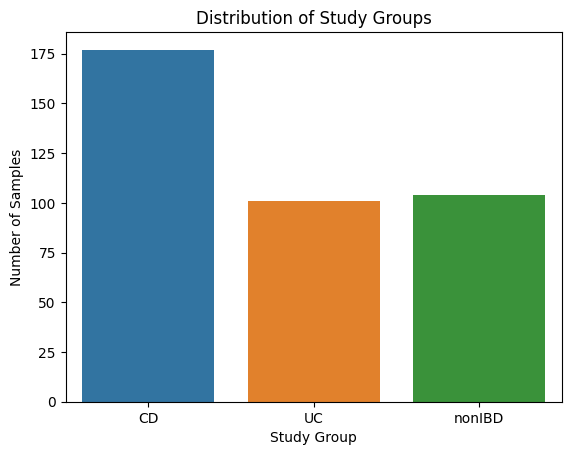

In [8]:
#Visualize the distribution above with a histogram

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=Study_group)
plt.title('Distribution of Study Groups')
plt.xlabel('Study Group')
plt.ylabel('Number of Samples')
plt.show()

The distribution of the study groups is relatively balanced. There are slightly more samples in the 'CD' group in comparison with the two other groups. The number of samples in the 'UC' and 'nonIBD' groups are nearly identical.


The scikit-learn library will be used to create our machine learning models, this requires all input variables to be in numeric format ['CD' = 0, 'UC' = 1, 'nonIBD' = 2].


In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(Study_group)

print(y)  
print('mapping:', encoder.classes_)

[0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 2 0 2 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 2 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 2 0 1 1 1 0 0 0 1 0 0 0
 0 1 1 1 0 0 1 1 1 1 1 0 0 0 2 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 2 0 0
 0 2 0 0 0 0 0 0 0 2 2 2 2 2 2 1 0 2 2 0 0 2 1 2 0 0 0 0 1 1 1 2 2 0 0 0 0
 0 0 2 0 2 0 0 0 0 0 2 1 2 1 1 2 2 0 0 2 0 0 1 1 2 2 2 0 2 2 0 1 1 0 0 0 0
 0 1 2 2 0 0 0 1 0 0 0 2 2 2 0 0 0 1 1 1 0 1 2 1 1 1 1 0 0 2 0 0 1 2 2 0 0
 0 0 1 2 0 0 0 0 2 2 0 0 0 0 2 0 0 1 1 0 2 2 2 0 2 0 0 2 2 2 2 0 2 2 1 1 2
 2 2 2 2 2 2 2 1 1 2 2 2 1 1 0 2 0 0 1 2 2 2 2 2 2 2 2 1 1 0 2 2 2 2 1 1 2
 2 2 2 1 2 2 1 1 0 1 0 1 2 2 0 2 2 1 1 1 0 2 2 2 2 0 0 1 1 2 2 2 1 2 0 0 1
 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 2 2 0 2 2 0 2 0 0 2 1 0 0 2 1 1 0 0 0 1 2
 0 0 1 0 0 1 1 1 1 1 1 1]
mapping: ['CD' 'UC' 'nonIBD']


Split the data into training and validation data, for both features and target. The split is based on a random number generator. #Supplying a numeric value to the random_state argument guarantees we get the same split every time we run the script.

In [10]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 2)

In [11]:
#Get a summary of descriptive statistics for the dataset train_X

train_X.describe()

,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Vicingaceae;g__BCD18,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__Flemingibacterium,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__F0428,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoanaerobaculum,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Carnobacteriaceae;g__Carnobacterium_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__GCA-900066755,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Oleiphilaceae;g__Tamilnaduibacter,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Rhizobiaceae;g__Pararhizobium,...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Paralactobacillus,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Acetobacterales;f__Acetobacteraceae;g__JAFKFI01,d__Bacteria;p__Bacteroidota;c__Chlorobia;o__Chlorobiales;f__Chloroherpetonaceae;g__GBChlB,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Propionibacteriales;f__Actinopolymorphaceae;g__Tenggerimyces,d__Bacteria;p__Patescibacteria;c__ABY1;o__UBA1558;f__GWA2-36-10;g__JABHSK01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Tepidibacillales;f__Tepidibacillaceae;g__Vulcanibacillus,d__Bacteria;p__Acidobacteriota;c__UBA6911;o__UBA6911;f__UBA6911;g__JAAYAM01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Aerococcaceae;g__Ignavigranum,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__UBA4665;g__PMNU01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Acetilactobacillus
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,...,286.0,286.0,286.0,286.0,286.0,286.000000,286.000000,286.000000,286.000000,286.000000
mean,0.713287,582.465035,82.213287,3.758741,256.437063,8.125874,1279.363636,0.419580,1422.416084,17.311189,...,0.0,0.0,0.0,0.0,0.0,0.038462,0.034965,0.034965,0.045455,0.048951
std,5.059120,2202.818091,116.911062,8.914477,255.800871,16.815977,2034.730225,4.110598,5066.954326,98.864843,...,0.0,0.0,0.0,0.0,0.0,0.650444,0.591312,0.591312,0.768706,0.827837
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,14.000000,22.000000,0.000000,77.500000,0.000000,275.750000,0.000000,20.250000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,32.000000,48.000000,0.000000,183.500000,0.000000,683.000000,0.000000,86.500000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,85.500000,93.000000,0.000000,332.000000,12.000000,1449.250000,0.000000,732.750000,18.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,57.000000,19386.000000,1137.000000,76.000000,1956.000000,142.000000,19750.000000,59.000000,44717.000000,1658.000000,...,0.0,0.0,0.0,0.0,0.0,11.000000,10.000000,10.000000,13.000000,14.000000


There are columns where the max bacterial count is 0. This means that the bacterium isn't detected in the samples in the training dataframe. These features will not provide additional information for the model so they will be deleted. The same columns deleted in the training data will be deleted in the test data.

In [12]:
# identify the columns in train_X where all the values are 0
columns_to_remove = train_X.columns[(train_X.sum(axis=0) == 0)]

# Delete these columns in train_X and in test_X
train_X_filtered = train_X.drop(columns=columns_to_remove)
test_X_filtered = test_X.drop(columns=columns_to_remove)

print(f"Number of deleted columns: {len(columns_to_remove)}")
print(f'Percentage of deleted columns: {(len(columns_to_remove)/9694)*100 : .2f}%')


Number of deleted columns: 383
Percentage of deleted columns:  3.95%


Only 3.95% of the columns were deleted. 

Check the distribution in the different study groups in train_y.

In [13]:
unique, counts = np.unique(train_y, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{0: 135, 1: 73, 2: 78}


Visualize the distribution.

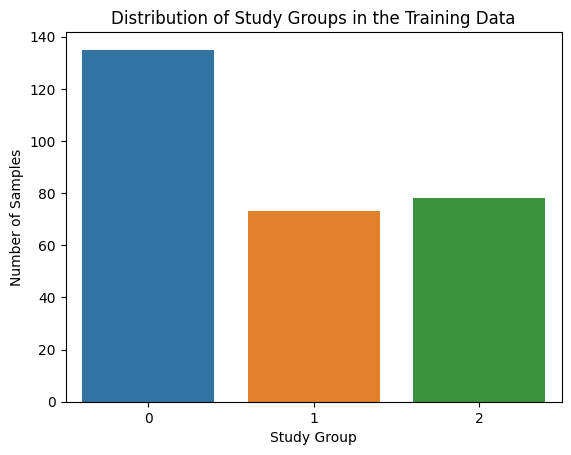

In [14]:
sns.countplot(x=train_y)
plt.title('Distribution of Study Groups in the Training Data')
plt.xlabel('Study Group')
plt.ylabel('Number of Samples')
plt.show()

The distributions across the groups are still relatively balanced in the same way as the original dataframe.

1) Logistic regression

Use ten random columns to visualize the distribution in a boxplot.

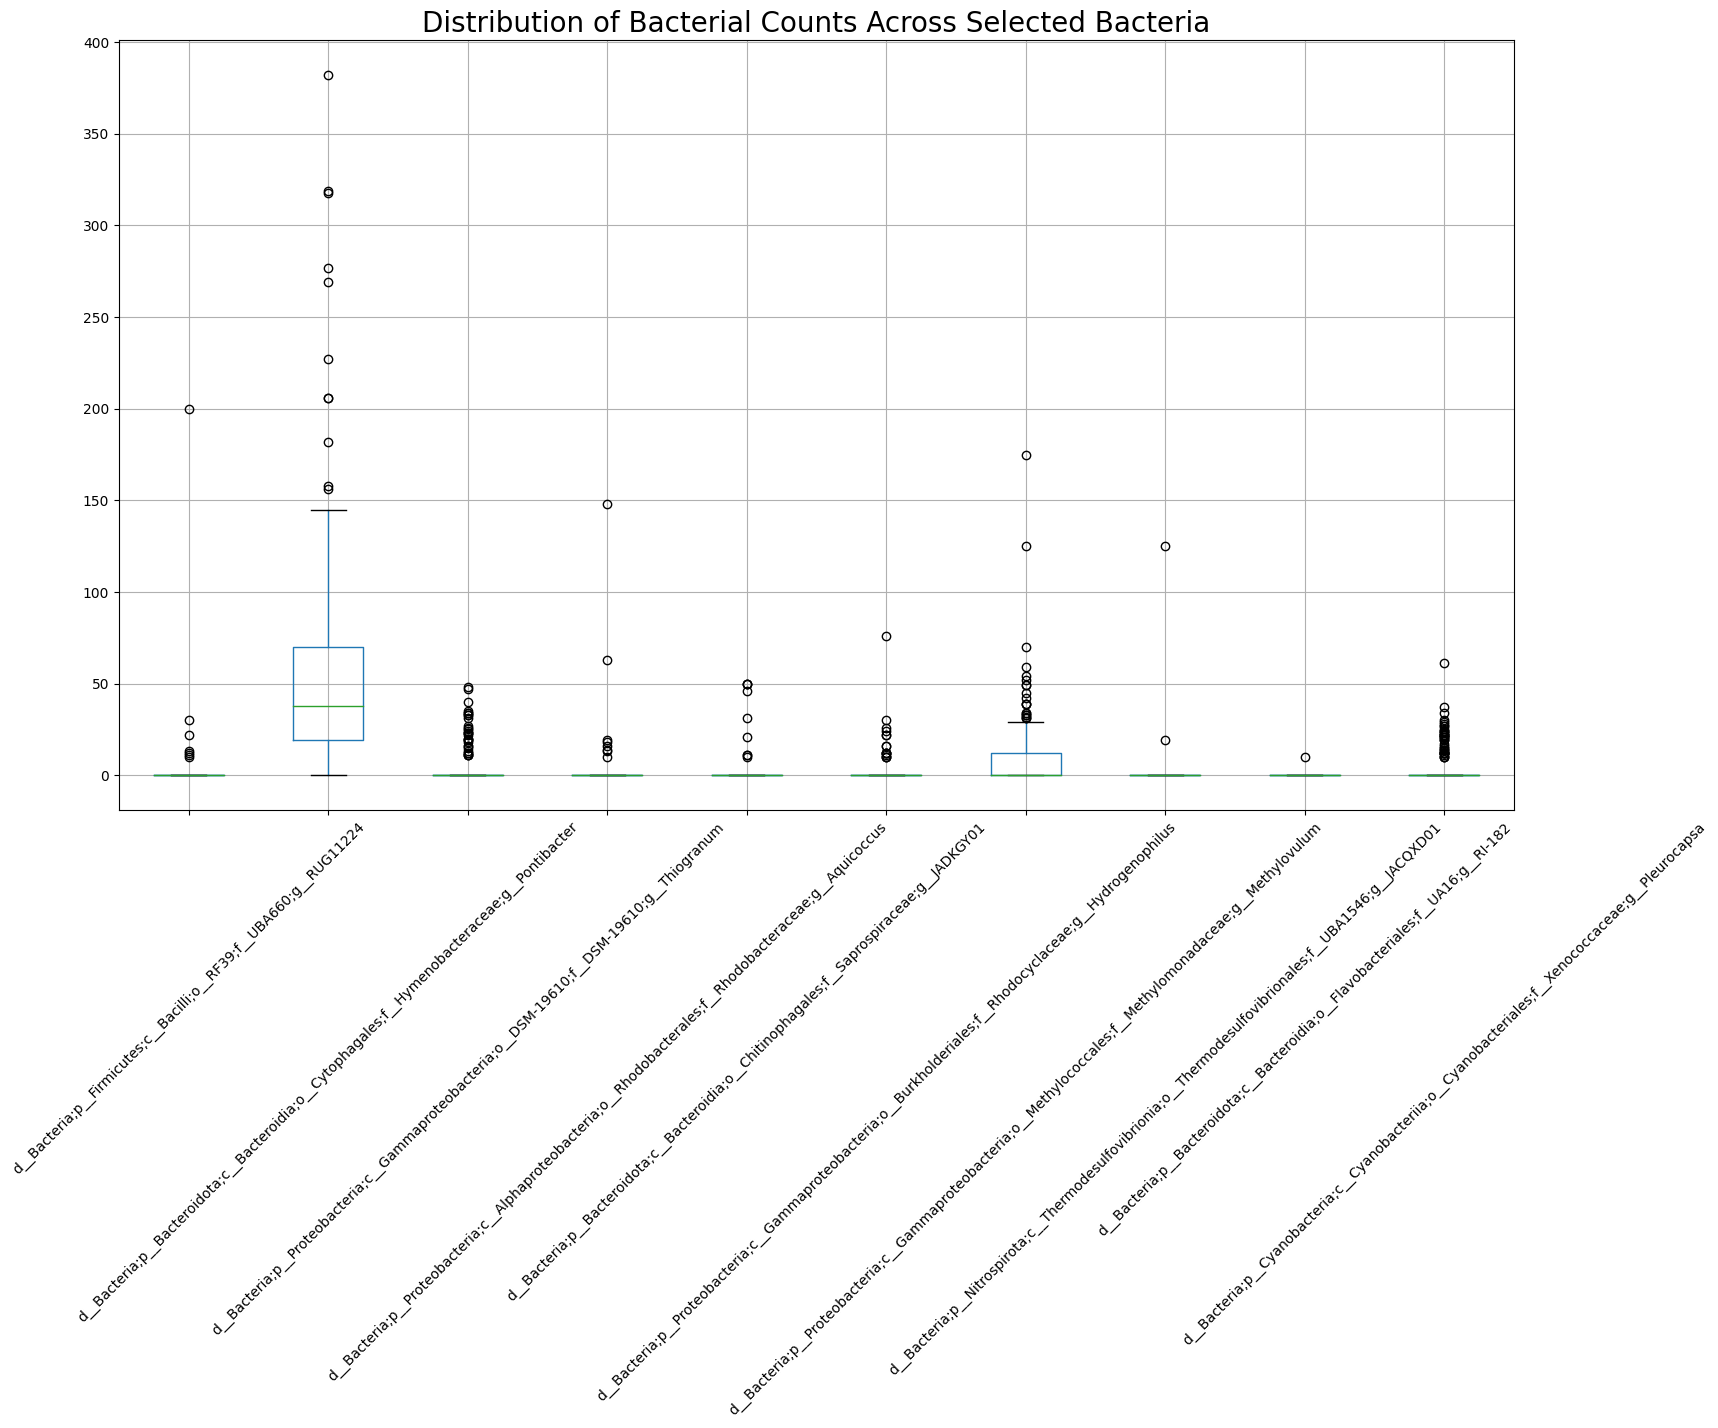

In [15]:
plt.figure(figsize=(18,10))
plt.title('Distribution of Bacterial Counts Across Selected Bacteria', fontsize = 20)
train_X_filtered.sample(10, axis="columns", random_state = 10).boxplot()
plt.xticks(rotation=45)
plt.show()

In [16]:
train_X_filtered.describe()

,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Vicingaceae;g__BCD18,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__Flemingibacterium,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__F0428,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoanaerobaculum,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Carnobacteriaceae;g__Carnobacterium_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__GCA-900066755,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Oleiphilaceae;g__Tamilnaduibacter,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Rhizobiaceae;g__Pararhizobium,...,d__Bacteria;p__Dependentiae;c__Babeliae;o__Babeliales;f__Vermiphilaceae;g__AWTP1-30,d__Bacteria;p__Chloroflexota;c__Anaerolineae;o__Anaerolineales;f__DRMV01;g__JAADEN01,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Beijerinckiaceae;g__REEB77,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Ichthyobacteriaceae;g__Ichthyobacterium,d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Atopobiaceae;g__RGIG4373,d__Bacteria;p__Firmicutes;c__Bacilli;o__Tepidibacillales;f__Tepidibacillaceae;g__Vulcanibacillus,d__Bacteria;p__Acidobacteriota;c__UBA6911;o__UBA6911;f__UBA6911;g__JAAYAM01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Aerococcaceae;g__Ignavigranum,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__UBA4665;g__PMNU01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Acetilactobacillus
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,...,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,0.713287,582.465035,82.213287,3.758741,256.437063,8.125874,1279.363636,0.419580,1422.416084,17.311189,...,0.038462,0.097902,0.052448,0.041958,0.048951,0.038462,0.034965,0.034965,0.045455,0.048951
std,5.059120,2202.818091,116.911062,8.914477,255.800871,16.815977,2034.730225,4.110598,5066.954326,98.864843,...,0.650444,1.195399,0.886969,0.709575,0.827837,0.650444,0.591312,0.591312,0.768706,0.827837
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,14.000000,22.000000,0.000000,77.500000,0.000000,275.750000,0.000000,20.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,32.000000,48.000000,0.000000,183.500000,0.000000,683.000000,0.000000,86.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,85.500000,93.000000,0.000000,332.000000,12.000000,1449.250000,0.000000,732.750000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57.000000,19386.000000,1137.000000,76.000000,1956.000000,142.000000,19750.000000,59.000000,44717.000000,1658.000000,...,11.000000,17.000000,15.000000,12.000000,14.000000,11.000000,10.000000,10.000000,13.000000,14.000000


The boxplot and the table above demonstrate that the data shows a large range, with bacteria counts varying from zero to several thousand.

Using standard scaler to standardize the data. Each feature will then have a mean of 0 and a standard deviation of 1, making the data more uniform and suitable for machine learning algorithms that are sensitive to feature scales.

In [17]:
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
scaler_std.fit(train_X_filtered) #The fit() method computes the mean and variance of each feature in the training dataset.
print("Means:")
print(scaler_std.mean_)
print("Variances:")
print(scaler_std.var_)

Means:
[7.13286713e-01 5.82465035e+02 8.22132867e+01 ... 3.49650350e-02
 4.54545455e-02 4.89510490e-02]
Variances:
[2.55052081e+01 4.83544108e+06 1.36204056e+04 ... 3.48427796e-01
 5.88842975e-01 6.82918480e-01]


The means and variances will be used to transform the dataset.

In [18]:
train_X_filtered_std = scaler_std.transform(train_X_filtered)

train_X_filtered_std

array([[-0.1412374 , -0.24851026,  0.94927634, ..., -0.05923489,
        -0.05923489, -0.05923489],
       [ 5.60103199, -0.24077935, -0.26745116, ..., -0.05923489,
        -0.05923489, -0.05923489],
       [-0.1412374 , -0.25123882, -0.32743068, ..., -0.05923489,
        -0.05923489, -0.05923489],
       ...,
       [-0.1412374 ,  0.9124912 , -0.11321809, ..., -0.05923489,
        -0.05923489, -0.05923489],
       [-0.1412374 , -0.23941507,  0.24665905, ..., -0.05923489,
        -0.05923489, -0.05923489],
       [-0.1412374 , -0.25851498, -0.70444484, ..., -0.05923489,
        -0.05923489, -0.05923489]])

Return as a dataframe.

In [19]:
train_X_filtered_std = pd.DataFrame(train_X_filtered_std, columns=train_X_filtered.columns)

train_X_filtered_std

,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Vicingaceae;g__BCD18,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__Flemingibacterium,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__F0428,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoanaerobaculum,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Carnobacteriaceae;g__Carnobacterium_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__GCA-900066755,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Oleiphilaceae;g__Tamilnaduibacter,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Rhizobiaceae;g__Pararhizobium,...,d__Bacteria;p__Dependentiae;c__Babeliae;o__Babeliales;f__Vermiphilaceae;g__AWTP1-30,d__Bacteria;p__Chloroflexota;c__Anaerolineae;o__Anaerolineales;f__DRMV01;g__JAADEN01,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Beijerinckiaceae;g__REEB77,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Ichthyobacteriaceae;g__Ichthyobacterium,d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Atopobiaceae;g__RGIG4373,d__Bacteria;p__Firmicutes;c__Bacilli;o__Tepidibacillales;f__Tepidibacillaceae;g__Vulcanibacillus,d__Bacteria;p__Acidobacteriota;c__UBA6911;o__UBA6911;f__UBA6911;g__JAAYAM01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Aerococcaceae;g__Ignavigranum,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__UBA4665;g__PMNU01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Acetilactobacillus
0,-0.141237,-0.248510,0.949276,-0.422384,2.559446,-0.484070,0.220384,-0.102252,-0.249979,0.037377,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
1,5.601032,-0.240779,-0.267451,-0.422384,-0.017376,-0.484070,-0.285236,-0.102252,-0.180388,-0.013286,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
2,-0.141237,-0.251239,-0.327431,-0.422384,-0.111364,-0.484070,0.548766,-0.102252,-0.264214,-0.175406,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
3,-0.141237,-0.238506,0.837886,-0.422384,-0.040873,0.171216,-0.431950,-0.102252,-0.220126,0.209630,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
4,-0.141237,-0.248056,-0.704445,3.847817,-0.275842,2.375361,-0.442781,-0.102252,-0.260655,-0.175406,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,-0.141237,-0.255786,-0.010396,-0.422384,-0.593049,0.886074,-0.502845,-0.102252,-0.281216,-0.175406,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
282,-0.141237,-0.253513,-0.276020,-0.422384,-0.158357,0.469073,0.232199,-0.102252,-0.281216,-0.175406,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
283,-0.141237,0.912491,-0.113218,-0.422384,0.123605,-0.484070,-0.267513,-0.102252,0.869614,-0.053816,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
284,-0.141237,-0.239415,0.246659,-0.422384,0.440813,0.349930,0.334111,-0.102252,-0.267377,-0.074081,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235


In [20]:
train_X_filtered_std.describe()

,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Vicingaceae;g__BCD18,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__Flemingibacterium,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__F0428,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoanaerobaculum,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Carnobacteriaceae;g__Carnobacterium_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__GCA-900066755,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Oleiphilaceae;g__Tamilnaduibacter,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Rhizobiaceae;g__Pararhizobium,...,d__Bacteria;p__Dependentiae;c__Babeliae;o__Babeliales;f__Vermiphilaceae;g__AWTP1-30,d__Bacteria;p__Chloroflexota;c__Anaerolineae;o__Anaerolineales;f__DRMV01;g__JAADEN01,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Beijerinckiaceae;g__REEB77,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Ichthyobacteriaceae;g__Ichthyobacterium,d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Atopobiaceae;g__RGIG4373,d__Bacteria;p__Firmicutes;c__Bacilli;o__Tepidibacillales;f__Tepidibacillaceae;g__Vulcanibacillus,d__Bacteria;p__Acidobacteriota;c__UBA6911;o__UBA6911;f__UBA6911;g__JAAYAM01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Aerococcaceae;g__Ignavigranum,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__UBA4665;g__PMNU01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Acetilactobacillus
count,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,...,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02
mean,-3.105519e-17,-1.863311e-17,5.589934e-17,7.763797e-19,1.552759e-17,-4.968830e-17,5.667572e-17,1.242208e-17,2.484415e-17,6.211038e-18,...,-6.211038e-18,9.316557e-18,1.863311e-17,2.484415e-17,3.105519e-17,4.347727e-17,1.863311e-17,1.863311e-17,1.863311e-17,3.105519e-17
std,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,...,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00
min,-1.412374e-01,-2.648816e-01,-7.044448e-01,-4.223837e-01,-1.004244e+00,-4.840705e-01,-6.298654e-01,-1.022518e-01,-2.812161e-01,-1.754065e-01,...,-5.923489e-02,-8.204267e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02
25%,-1.412374e-01,-2.585150e-01,-5.159378e-01,-4.223837e-01,-7.007432e-01,-4.840705e-01,-4.941062e-01,-1.022518e-01,-2.772127e-01,-1.754065e-01,...,-5.923489e-02,-8.204267e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02
50%,-1.412374e-01,-2.503293e-01,-2.931567e-01,-4.223837e-01,-2.856320e-01,-4.840705e-01,-2.936060e-01,-1.022518e-01,-2.641148e-01,-1.754065e-01,...,-5.923489e-02,-8.204267e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02
75%,-1.412374e-01,-2.259997e-01,9.242599e-02,-4.223837e-01,2.959153e-01,2.307875e-01,8.363966e-02,-1.022518e-01,-1.363492e-01,6.979413e-03,...,-5.923489e-02,-8.204267e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02
max,1.114529e+01,8.551090e+00,9.037944e+00,8.118018e+00,6.655732e+00,7.975081e+00,9.093595e+00,1.427605e+01,8.559476e+00,1.662436e+01,...,1.688194

Each feature now has a mean around 0 and a variance around 1.

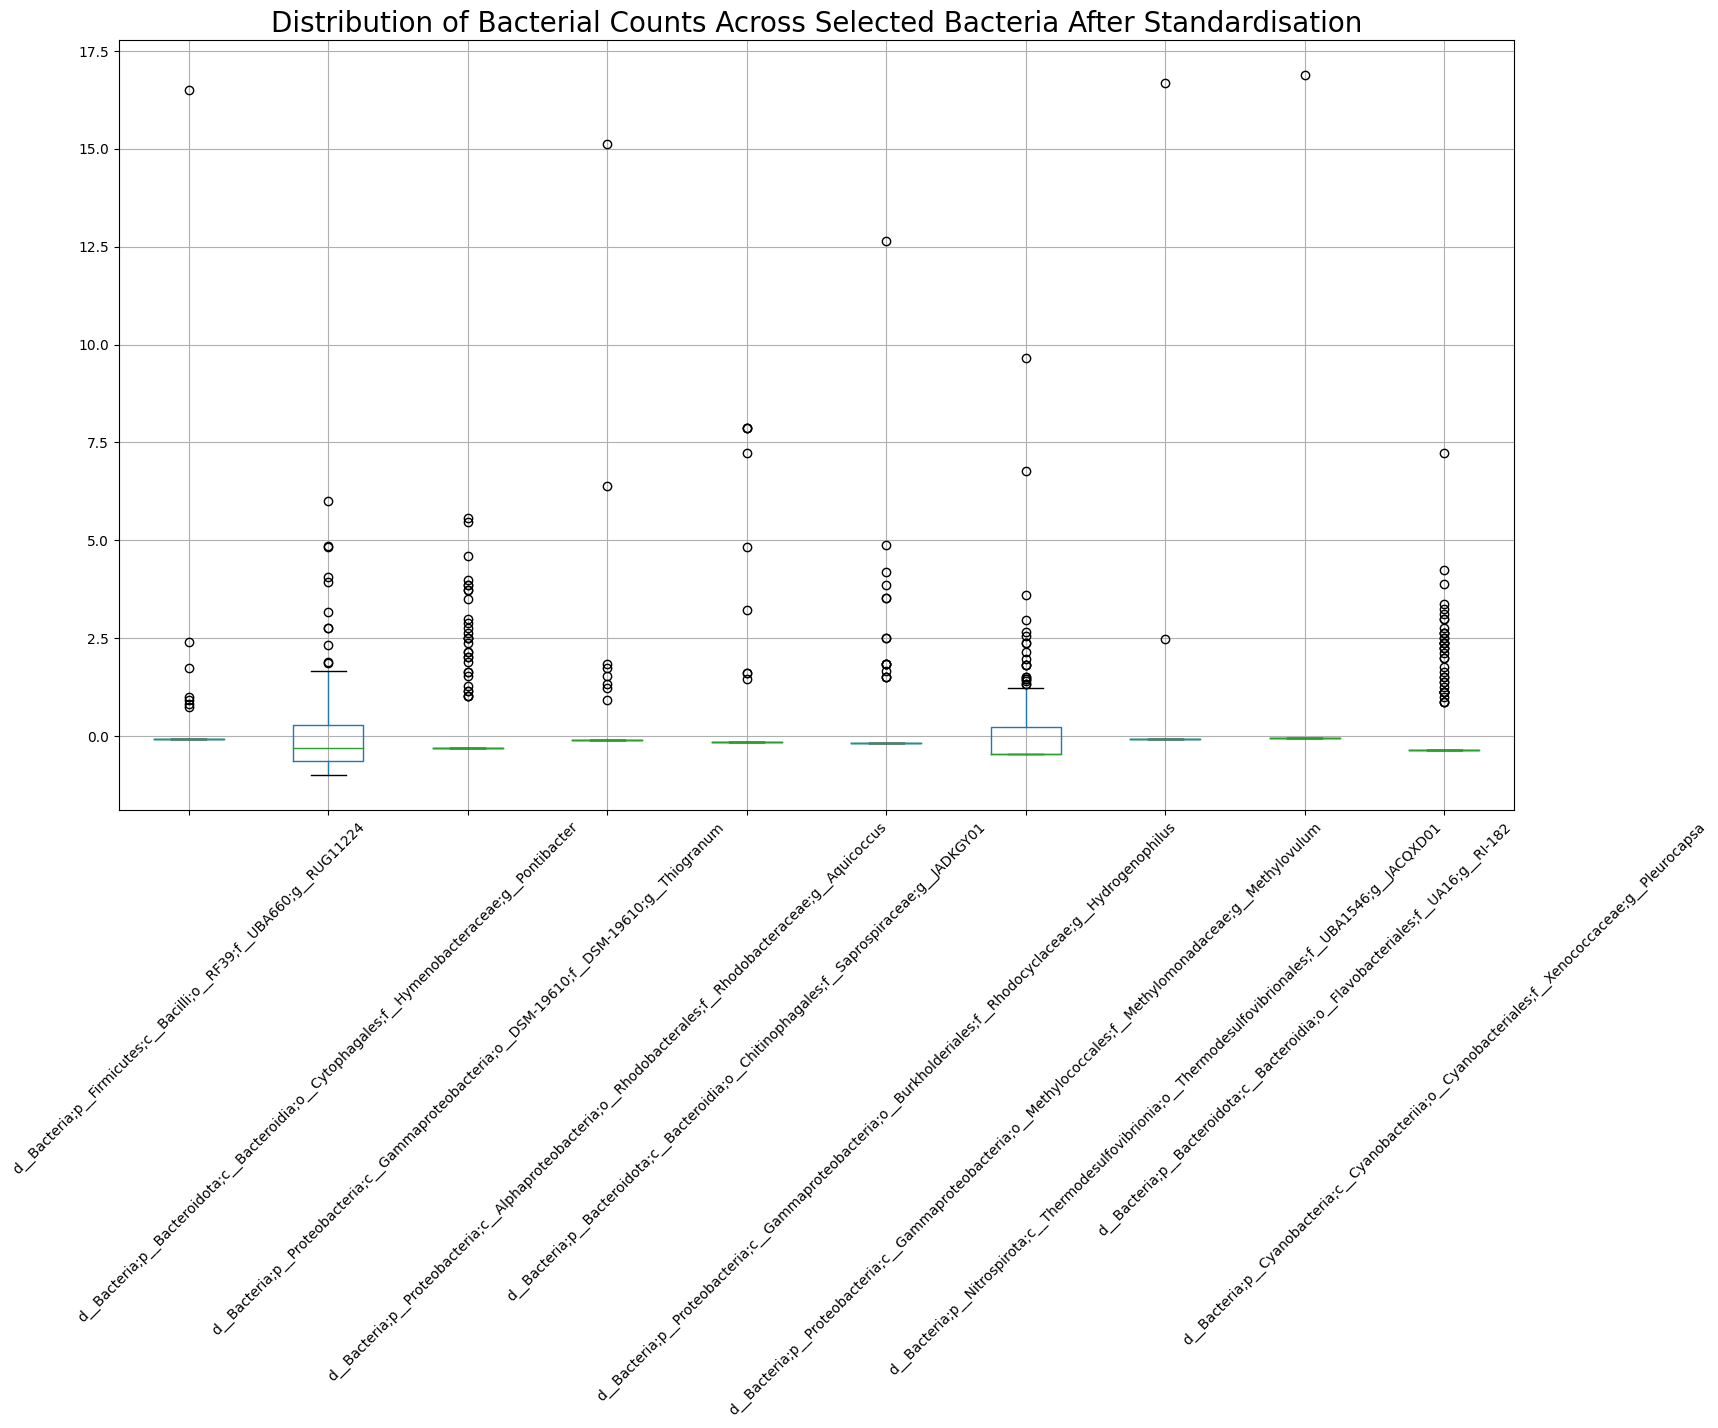

In [21]:
plt.figure(figsize=(18,10))
plt.title('Distribution of Bacterial Counts Across Selected Bacteria After Standardisation', fontsize = 20)
train_X_filtered_std.sample(10, axis="columns", random_state = 10).boxplot()
plt.xticks(rotation=45)
plt.show()

Apply standard scaling in the same way to the test dataset.

In [22]:
test_X_filtered_std = pd.DataFrame(scaler_std.transform(test_X_filtered),columns=test_X_filtered.columns)

Model training

In [23]:
from sklearn.linear_model import LogisticRegression

cls_std = LogisticRegression(multi_class= 'multinomial')

In [24]:
cls_std.fit(train_X_filtered_std, train_y)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

The warning messages says that the max number of iterations is reached. The default number of max itterations is 100, increasing it to 1000 might solve the problem.

In [25]:
from sklearn.linear_model import LogisticRegression

cls_std = LogisticRegression(multi_class= 'multinomial', max_iter = 1000)

In [26]:
cls_std.fit(train_X_filtered_std, train_y)

LogisticRegression(max_iter=1000, multi_class='multinomial')

No warning message anymore.

Logistic regression assigns a weight to each feature (input variable) in order to determine the contribution of that feature to the final decision (class).

In [27]:
cls_std.coef_[0] #coefficients for the first class (class 0 = CD)

array([-0.00363852,  0.00405295,  0.00928678, ...,  0.00515243,
        0.0093921 ,  0.0093921 ])

A positive coefficient means that as the feature increases, the likelihood of that class increases.
A negative coefficient means that as the feature increases, the likelihood of that class decreases.
The magnitude of the coefficient represents how strong the influence is.

Test how well the models predict the study group.

In [28]:
predictions_std = cls_std.predict(test_X_filtered_std)
predictions_std

array([0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1, 1, 0, 2, 1, 2, 0,
       0, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0])

Generate the predicted probabilities for each class

In [29]:
predictions_proba_std = cls_std.predict_proba(test_X_filtered_std)

predictions_proba_std[:10]

array([[9.73510325e-01, 2.64046122e-02, 8.50623210e-05],
       [7.03572534e-06, 9.99963370e-01, 2.95942978e-05],
       [2.75430141e-03, 1.53366798e-03, 9.95712031e-01],
       [8.61925800e-01, 4.83654450e-02, 8.97087547e-02],
       [9.93330286e-01, 6.50502831e-03, 1.64685285e-04],
       [9.99997362e-01, 1.82948111e-06, 8.08315760e-07],
       [2.89517629e-01, 7.09859104e-01, 6.23266662e-04],
       [9.17693293e-01, 4.45793381e-02, 3.77273689e-02],
       [6.53439474e-01, 1.27784764e-01, 2.18775762e-01],
       [8.51519680e-01, 2.15800863e-02, 1.26900234e-01]])

Calculate the accuracy of the logistic regression model on the standardized data.

In [30]:
print("Accuracy: {}".format(cls_std.score(test_X_filtered_std,test_y)))

Accuracy: 0.3854166666666667


Modelparameters and gene importance

Creating a dataframe that contains a columns with the features and three columns with the coefficient corresponding to the three classes.

In [31]:
attribute = train_X_filtered_std.columns
parameter1 = cls_std.coef_[0]
parameter2 = cls_std.coef_[1]
parameter3 = cls_std.coef_[2]
model_parameters = pd.DataFrame({'attribute' : attribute, 'parameter1_value' : parameter1, 'parameter2_value' : parameter2,'parameter3_value' : parameter3})

model_parameters

,attribute,parameter1_value,parameter2_value,parameter3_value
0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,-0.003639,0.003123,0.000515
1,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...,0.004053,-0.010388,0.006335
2,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,0.009287,-0.003060,-0.006227
3,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__P...,0.001369,-0.013631,0.012262
4,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,-0.005711,0.000620,0.005092
...,...,...,...,...
9306,d__Bacteria;p__Firmicutes;c__Bacilli;o__Tepidi...,0.005152,-0.003025,-0.002128
9307,d__Bacteria;p__Acidobacteriota;c__UBA6911;o__U...,0.005152,-0.003025,-0.002128
9308,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,0.005152,-0.003025,-0.002128
9309,d__Bacteria;p__Patescibacteria;c__Saccharimona...,0.009392,-0.006101,-0.003291


The absolute value of these coefficients give an indication of the feature importance in the classification.

In [32]:
model_parameters['parameter1_abs_value'] = model_parameters['parameter1_value'].map(abs)
model_parameters['parameter2_abs_value'] = model_parameters['parameter2_value'].map(abs)
model_parameters['parameter3_abs_value'] = model_parameters['parameter3_value'].map(abs)
new_order = ['attribute', 'parameter1_abs_value', 'parameter2_abs_value', 'parameter3_abs_value']
model_parameters_abs = model_parameters[new_order]
model_parameters_abs

,attribute,parameter1_abs_value,parameter2_abs_value,parameter3_abs_value
0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.003639,0.003123,0.000515
1,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...,0.004053,0.010388,0.006335
2,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,0.009287,0.003060,0.006227
3,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__P...,0.001369,0.013631,0.012262
4,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,0.005711,0.000620,0.005092
...,...,...,...,...
9306,d__Bacteria;p__Firmicutes;c__Bacilli;o__Tepidi...,0.005152,0.003025,0.002128
9307,d__Bacteria;p__Acidobacteriota;c__UBA6911;o__U...,0.005152,0.003025,0.002128
9308,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,0.005152,0.003025,0.002128
9309,d__Bacteria;p__Patescibacteria;c__Saccharimona...,0.009392,0.006101,0.003291


Most important features for class 0 (CD).

In [33]:
columns_parameter1 = ['attribute', 'parameter1_value', 'parameter1_abs_value']
parameter1_df = model_parameters[columns_parameter1]
parameter1_df = parameter1_df.sort_values(by = 'parameter1_abs_value', ascending = False)
pd.set_option('display.max_colwidth', None) #change settings so that the full bacteria names are visible (the column width was to small)
parameter1_df

,attribute,parameter1_value,parameter1_abs_value
182,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Acutalibacteraceae;g__Onthovicinus,-1.618252e-01,1.618252e-01
3871,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales_A;f__Rhizobiaceae_A;g__Falsochrobactrum,1.558255e-01,1.558255e-01
3803,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Cytophagales;f__Thermonemataceae;g__Thermonema,-1.512419e-01,1.512419e-01
270,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lacrimispora,-1.489645e-01,1.489645e-01
9075,d__Bacteria;p__DTU030;c__DTU030;o__DUMP01;f__DUMP01;g__DUNI01,1.347488e-01,1.347488e-01
...,...,...,...
6706,d__Bacteria;p__Firmicutes;c__Bacilli;o__Paenibacillales;f__K13;g__Xylanibacillus,7.937573e-06,7.937573e-06
2160,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__UMGS1312,5.955922e-06,5.955922e-06
5865,d__Bacteria;p__Elusimicrobiota;c__Elusimicrobia;o__Elusimicrobiales;f__UBA9959;g__YA12-FULL-51-18,-3.345925e-06,3.345925e-06
3288,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__VadinHA17;g__SLNP01,-3.137032e-06,3.137032e-06


Most important features for class 1 (UC)

In [34]:
columns_parameter2 = ['attribute', 'parameter2_value', 'parameter2_abs_value']
parameter2_df = model_parameters[columns_parameter2]
parameter2_df = parameter2_df.sort_values(by = 'parameter2_abs_value', ascending = False)
parameter2_df

,attribute,parameter2_value,parameter2_abs_value
270,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lacrimispora,1.881572e-01,1.881572e-01
49,d__Bacteria;p__Cyanobacteria;c__Cyanobacteriia;o__PCC-6307;f__Cyanobiaceae;g__Prochlorococcus,1.563006e-01,1.563006e-01
2490,d__Bacteria;p__Cyanobacteria;c__Cyanobacteriia;o__Cyanobacteriales;f__Nostocaceae;g__Cuspidothrix,1.220364e-01,1.220364e-01
7897,d__Bacteria;p__Patescibacteria;c__Paceibacteria;o__UBA9983;f__2-01-FULL-45-33;g__MFHE01,1.079913e-01,1.079913e-01
4334,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales_A;f__Enterobacteriaceae_A;g__Riesia,9.524063e-02,9.524063e-02
...,...,...,...
4450,d__Bacteria;p__Desulfobacterota;c__Syntrophia;o__Syntrophales;f__UBA6807;g__JAFGQS01,-4.678684e-06,4.678684e-06
1833,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Firm-18;g__JAAZFB01,2.855695e-06,2.855695e-06
211,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Geodermatophilaceae;g__Geodermatophilus,1.499214e-06,1.499214e-06
346,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__RF32;f__CAG-239;g__HGM16780,5.326225e-07,5.326225e-07


Most important features for class 2 (nonIBD)

In [35]:
columns_parameter3 = ['attribute', 'parameter3_value', 'parameter3_abs_value']
parameter3_df = model_parameters[columns_parameter3]
parameter3_df = parameter3_df.sort_values(by = 'parameter3_abs_value', ascending = False)
parameter3_df

,attribute,parameter3_value,parameter3_abs_value
182,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Acutalibacteraceae;g__Onthovicinus,0.231271,0.231271
3803,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Cytophagales;f__Thermonemataceae;g__Thermonema,0.182630,0.182630
848,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Anaerovoracaceae;g__Eubacterium_B,0.140555,0.140555
3871,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales_A;f__Rhizobiaceae_A;g__Falsochrobactrum,-0.123779,0.123779
9075,d__Bacteria;p__DTU030;c__DTU030;o__DUMP01;f__DUMP01;g__DUNI01,-0.115051,0.115051
...,...,...,...
1987,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Tissierellales;f__Peptoniphilaceae;g__Peptoniphilus_C,-0.000010,0.000010
6568,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Pukyongia,0.000009,0.000009
7303,d__Bacteria;p__Patescibacteria;c__Microgenomatia;o__UBA1406;f__HO2-37-13b;g__OLB23,0.000002,0.000002
7082,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae;g__RUG14871,-0.000001,0.000001


Select the 10 best features for each of the 3 classes.

In [36]:
best_parameters1 = parameter1_df.iloc[:10]
best_parameters2 = parameter2_df.iloc[:10]
best_parameters3 = parameter3_df.iloc[:10]

Make a list with the al the names of all the best features.

In [37]:
selected_attributes1 = list(best_parameters1.loc[:,'attribute'] )
selected_attributes2 = list(best_parameters2.loc[:,'attribute'] )
selected_attributes3 = list(best_parameters3.loc[:,'attribute'] )
selected_attributes_tot = selected_attributes1 + selected_attributes2 + selected_attributes3
selected_attributes_tot

['d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Acutalibacteraceae;g__Onthovicinus',
 'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales_A;f__Rhizobiaceae_A;g__Falsochrobactrum',
 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Cytophagales;f__Thermonemataceae;g__Thermonema',
 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lacrimispora',
 'd__Bacteria;p__DTU030;c__DTU030;o__DUMP01;f__DUMP01;g__DUNI01',
 'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Caulobacterales;f__Parvularculaceae;g__Parvularcula',
 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Anaerovoracaceae;g__Eubacterium_B',
 'd__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales_G;f__Sporolactobacillaceae;g__Sporolactobacillus',
 'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Burkholderiaceae;g__JADJWR01',
 'd__Bacteria;p__Cyanobacteria;c__Cyanobacteriia;o__PCC-6307;f__Cyanobiaceae;g__Prochlorococ

Take out the duplicates

In [38]:
unique_attributes = list(set(selected_attributes_tot))
print(unique_attributes)
print(f'There were {30 - len(unique_attributes)} duplicates in the list, so now there are {len(unique_attributes)} in the list.')

['d__Bacteria;p__Firmicutes;c__Bacilli;o__Alicyclobacillales;f__Alicyclobacillaceae;g__Alicyclobacillus_B', 'd__Bacteria;p__Cyanobacteria;c__Cyanobacteriia;o__PCC-6307;f__Cyanobiaceae;g__Prochlorococcus', 'd__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales_G;f__Sporolactobacillaceae;g__Sporolactobacillus', 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Anaerovoracaceae;g__Eubacterium_B', 'd__Bacteria;p__Myxococcota_A;c__UBA9160;o__UBA9160;f__UBA4427;g__JADJOR01', 'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Methylococcales;f__Methylomonadaceae;g__JABFRC01', 'd__Bacteria;p__Nitrospinota;c__Nitrospinia;o__Nitrospinales;f__Nitrospinaceae;g__Nitromaritima', 'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales_A;f__Rhizobiaceae_A;g__Falsochrobactrum', 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lacrimispora', 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Clostridium

Train a logsitic regression model on the train set that contains only the standardized features for the most important bacteria

In [39]:
cls_std.fit(train_X_filtered_std[selected_attributes_tot],train_y)

LogisticRegression(max_iter=1000, multi_class='multinomial')

Print the prediction accuracy on the corresponing test set

In [40]:
print("Accuracy: {}".format(cls_std.score(train_X_filtered_std[selected_attributes_tot],train_y)))

Accuracy: 0.5454545454545454


The accuracy is a lot better now that we reduced the number of columns to 20. Only the most important bacteria are used for predicting the class (CD, UC or nonIBD).

Reducing dimension with the use of t-SNE

The input to t-SNE is the bacterial abundance data for each sample (the 9,000+ columns).
t-SNE reduces these thousands of dimensions into two dimensions (x and y in the plot), capturing relationships between samples based on their bacterial compositions.
Individual bacteria are not directly represented, bacteria are indirectly reflected in the distances and clustering of the points. If two samples have similar bacterial compositions, they will appear closer in the plot.

In [41]:
from sklearn.manifold import TSNE

model_tSNE = TSNE(n_components=2, perplexity=10)

In [42]:
X_embedded = model_tSNE.fit_transform(train_X_filtered_std)

X_embedded

array([[-1.09181967e+01,  6.37829685e+00],
       [ 3.66190386e+00,  2.78160419e+01],
       [-1.08939135e+00, -1.54054432e+01],
       [-1.41005716e+01, -1.14645205e-01],
       [-3.33494263e+01,  3.52770299e-01],
       [-2.26454487e+01, -2.77158318e+01],
       [-1.84687233e+01, -2.11720181e+01],
       [ 2.53204212e+01,  1.34633392e-01],
       [-1.07592344e+01,  2.44107552e+01],
       [-1.32792196e+01, -2.07838845e+00],
       [ 2.20124283e+01, -1.88891354e+01],
       [ 1.76546326e+01,  2.40218830e+01],
       [ 1.40996380e+01,  5.67156136e-01],
       [-1.18180456e+01,  1.28096323e+01],
       [-3.45013070e+00,  1.23972082e+01],
       [-1.53748751e+01, -3.08645511e+00],
       [ 2.74429932e+01, -5.19705601e-02],
       [ 4.00703764e+00, -2.94428349e+00],
       [ 3.06257629e+01,  2.15196037e+01],
       [ 7.96270514e+00,  1.21936741e+01],
       [-1.97309036e+01, -2.16202316e+01],
       [ 2.98250408e+01,  3.03048939e-01],
       [ 8.78982735e+00, -1.01372890e+01],
       [ 6.

Putting the results from above in a dataframe.

In [43]:
tsne_result = pd.DataFrame(X_embedded, columns=["t-SNE_1","t-SNE_2"])
tsne_result["label"] = train_y

tsne_result

,t-SNE_1,t-SNE_2,label
0,-10.918197,6.378297,0
1,3.661904,27.816042,1
2,-1.089391,-15.405443,0
3,-14.100572,-0.114645,0
4,-33.349426,0.352770,2
...,...,...,...
281,9.766238,17.882771,1
282,-6.991136,12.300900,0
283,-22.226095,8.188267,0
284,7.787585,-14.435857,0


Showing the result in a 2D plot.

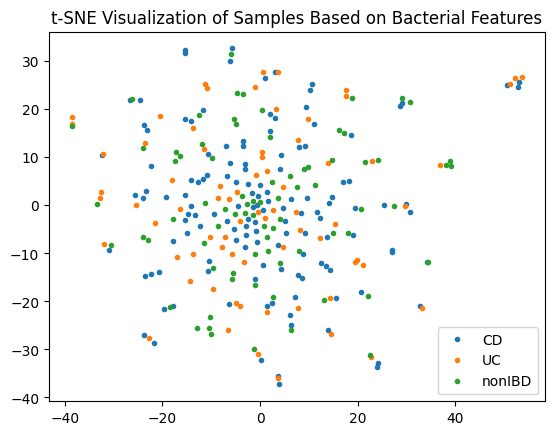

In [44]:
fig, ax = plt.subplots()
plt.title('t-SNE Visualization of Samples Based on Bacterial Features')
tmp = tsne_result[tsne_result["label"]==0]
ax.plot(tmp["t-SNE_1"], tmp["t-SNE_2"], marker='o', linestyle='', ms=3, label="CD")
tmp = tsne_result[tsne_result["label"]==1]
ax.plot(tmp["t-SNE_1"], tmp["t-SNE_2"], marker='o', linestyle='', ms=3, label="UC")
tmp = tsne_result[tsne_result["label"]==2]
ax.plot(tmp["t-SNE_1"], tmp["t-SNE_2"], marker='o', linestyle='', ms=3, label="nonIBD")
ax.legend()
plt.show()


This t-SNE plot visualizes the data distribution using all the bacterial features. The points represent individual samples, colored according to their disease group: CD (blue), UC (orange), and nonIBD (green). The plot shows significant overlap between the groups, suggesting that the full dataset does not provide strong differentiation between the disease categories. While there is some clustering, no distinct boundaries between groups are evident. This may indicate that additional preprocessing, feature selection, or more complex modeling is required to improve the separation of the classes.

t-SNE for the 20 most usefull bacteria.

In [45]:
train_X_filtered_std_20 = train_X_filtered_std[selected_attributes_tot]
X_embedded_top = model_tSNE.fit_transform(train_X_filtered_std_20)
tsne_result_top = pd.DataFrame(X_embedded_top, columns=["t-SNE_1","t-SNE_2"])
tsne_result_top["label"] = train_y
tsne_result_top

,t-SNE_1,t-SNE_2,label
0,-20.879297,9.564390,0
1,4.735502,39.613026,1
2,-2.331892,-2.123465,0
3,-52.185242,5.977183,0
4,0.269716,17.331602,2
...,...,...,...
281,1.834118,29.079504,1
282,-14.818979,7.828788,0
283,10.919192,17.415136,0
284,-8.324086,-15.186131,0


Showing the result in a 2D plot.

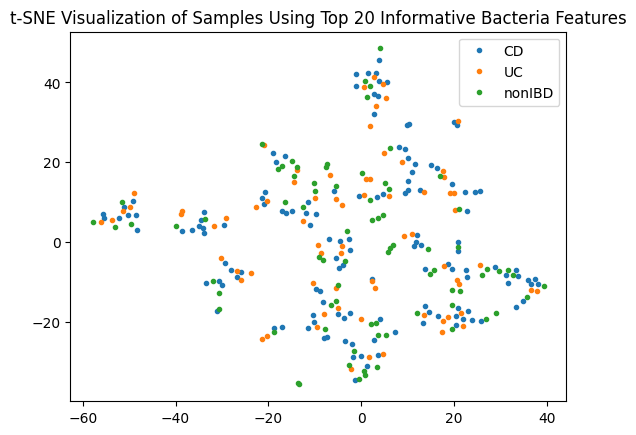

In [46]:
fig, ax = plt.subplots()
plt.title('t-SNE Visualization of Samples Using Top 20 Informative Bacteria Features')
tmp = tsne_result_top[tsne_result_top["label"]==0]
ax.plot(tmp["t-SNE_1"], tmp["t-SNE_2"], marker='o', linestyle='', ms=3, label="CD")
tmp = tsne_result_top[tsne_result_top["label"]==1]
ax.plot(tmp["t-SNE_1"], tmp["t-SNE_2"], marker='o', linestyle='', ms=3, label="UC")
tmp = tsne_result_top[tsne_result_top["label"]==2]
ax.plot(tmp["t-SNE_1"], tmp["t-SNE_2"], marker='o', linestyle='', ms=3, label="nonIBD")
ax.legend()
plt.show()


The second t-SNE plot focuses on the 20 most informative bacteria (features selected using logistic regression). Unlike the first plot, this plot shows more distinct groupings of samples.

Samples belonging to the same disease group (CD, UC, nonIBD) appear to form some small local clusters, indicating that these 20 bacteria carry more meaningful information for distinguishing the groups.
While there is still overlap between the groups, the separation is improved compared to the first plot with the full dataset.
This suggests that selecting the most important features enhances the ability to distinguish between disease categories.

2) Decission Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

# Define model. Specify a number for random_state to ensure same results each run
dtc = DecisionTreeClassifier(random_state=1)

# Fit model
dtc.fit(train_X, train_y)

DecisionTreeClassifier(random_state=1)

In [48]:
predictions_dtc = dtc.predict(test_X)
print(predictions_dtc)

[1 0 1 2 0 0 2 1 0 1 0 2 0 2 1 1 0 1 2 1 1 1 0 0 0 2 1 1 1 1 0 0 1 0 2 0 0
 2 0 2 2 2 2 1 2 2 1 0 0 2 0 2 1 2 2 0 2 1 1 0 2 2 0 0 0 1 0 0 0 1 2 0 0 0
 1 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2]


Calculate the accuracy of the model.

In [49]:
dtc.score(test_X, test_y) #accuracy

0.4479166666666667